In [5]:
!pip install pycaret

  Using cached plotly-4.4.1-py2.py3-none-any.whl (7.3 MB)
Processing c:\users\mahesh\appdata\local\pip\cache\wheels\ce\c7\f1\dbfef4848ebb048cb1d4a22d1ed0c62d8ff2523747235e19fe\pandas_profiling-2.3.0-py2.py3-none-any.whl
  Using cached s3transfer-0.3.3-py2.py3-none-any.whl (69 kB)
  Using cached botocore-1.16.25-py2.py3-none-any.whl (6.2 MB)
  Attempting uninstall: plotly
    Found existing installation: plotly 4.8.1
    Uninstalling plotly-4.8.1:
      Successfully uninstalled plotly-4.8.1
  Attempting uninstall: pandas-profiling
    Found existing installation: pandas-profiling 2.7.1
    Uninstalling pandas-profiling-2.7.1:
      Successfully uninstalled pandas-profiling-2.7.1
  Attempting uninstall: botocore
    Found existing installation: botocore 1.10.84
    Uninstalling botocore-1.10.84:
      Successfully uninstalled botocore-1.10.84
  Attempting uninstall: s3transfer
    Found existing installation: s3transfer 0.1.13
    Uninstalling s3transfer-0.1.13:
      Successfully uninst

ERROR: boto3 1.7.31 has requirement botocore<1.11.0,>=1.10.31, but you'll have botocore 1.16.25 which is incompatible.
ERROR: boto3 1.7.31 has requirement s3transfer<0.2.0,>=0.1.10, but you'll have s3transfer 0.3.3 which is incompatible.
You should consider upgrading via the 'c:\users\mahesh\anaconda3\python.exe -m pip install --upgrade pip' command.


### Import Required Packages and load data

In [1]:
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
data.shape

(1338, 7)

In [3]:
data_seen = data.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_unseen = data.drop(data_seen.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data_seen.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (1204, 7)
Unseen Data For Predictions: (134, 7)


### Model Buliding

In [4]:
from pycaret.regression import *

### a) Setting up Environment in Pycaret

In [5]:
exp_101 = setup(data_seen, target = 'charges', session_id = 123,normalize = True,polynomial_features = True, trigonometry_features = True, feature_interaction=True, 
           bin_numeric_features= ['age', 'bmi'])

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1204, 7)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [6]:
exp_101[0].columns

Index(['age_Power2', 'bmi_Power2', 'sex_female', 'children_0', 'children_1',
       'children_2', 'children_3', 'children_4', 'children_5', 'smoker_no',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'age_0.0', 'age_1.0', 'age_10.0', 'age_11.0',
       'age_2.0', 'age_3.0', 'age_4.0', 'age_5.0', 'age_6.0', 'age_7.0',
       'age_8.0', 'age_9.0', 'bmi_0.0', 'bmi_1.0', 'bmi_10.0', 'bmi_11.0',
       'bmi_2.0', 'bmi_3.0', 'bmi_4.0', 'bmi_5.0', 'bmi_6.0', 'bmi_7.0',
       'bmi_8.0', 'bmi_9.0', 'region_southeast_multiply_smoker_no',
       'age_0.0_multiply_smoker_no', 'children_0_multiply_bmi_Power2',
       'smoker_no_multiply_bmi_Power2', 'children_2_multiply_bmi_Power2',
       'sex_female_multiply_bmi_Power2',
       'region_southeast_multiply_bmi_Power2',
       'age_Power2_multiply_bmi_Power2', 'bmi_Power2_multiply_age_7.0',
       'smoker_no_multiply_sex_female', 'smoker_no_multiply_children_0',
       'smoker_no_multiply_age_Power2', 

#### Creating List of models

In [6]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,2429.63,2.01226e+07,4405.64,0.8535,0.4286,0.2998
1,Gradient Boosting Regressor,2477.76,2.07665e+07,4479.11,0.8499,0.4273,0.3016
2,CatBoost Regressor,2551.07,2.17737e+07,4597.38,0.8421,0.4421,0.3052
3,Ridge Regression,2904.18,2.21121e+07,4666.49,0.8413,0.4411,0.3227
4,Bayesian Ridge,2909.55,2.21399e+07,4670.2,0.8412,0.4403,0.3236
5,Lasso Regression,2886.07,2.20828e+07,4661.26,0.8411,0.4377,0.3188
6,Random Forest,2561.99,2.2267e+07,4640.63,0.8381,0.4521,0.3108
7,TheilSen Regressor,2784.15,2.26331e+07,4722.83,0.8379,0.4412,0.2784
8,Light Gradient Boosting Machine,2808.06,2.24804e+07,4677.98,0.8368,0.5246,0.3633
9,Orthogonal Matching Pursuit,2950.71,2.31286e+07,4778.37,0.8337,0.4523,0.3298


### Choose the top model

In [7]:
egb = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2335.7804,1.671190e+07,4088.0193,0.8935,0.4017,0.2829
1,1585.7657,6.432139e+06,2536.1663,0.9660,0.3011,0.2512
2,2475.6718,1.741453e+07,4173.0722,0.8651,0.4418,0.3498
3,2764.4970,2.505963e+07,5005.9597,0.7840,0.4878,0.2976
4,2829.2914,2.992301e+07,5470.1933,0.8106,0.4538,0.2362
5,2564.0098,2.138080e+07,4623.9378,0.8513,0.4629,0.3402
6,2556.6954,2.278393e+07,4773.2513,0.8748,0.4007,0.2936
7,2644.6183,2.383747e+07,4882.3629,0.7771,0.4790,0.3346
8,2057.0091,1.140655e+07,3377.3588,0.9437,0.4179,0.3677
9,2482.9489,2.627634e+07,5126.0455,0.7690,0.4396,0.2445


### Tuning Model

In [10]:
tune_egb = tune_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3020.2809,2.243998e+07,4737.0853,0.8570,0.9362,0.3999
1,2167.8172,1.143633e+07,3381.7649,0.9395,0.4295,0.3894
2,2882.6672,1.954621e+07,4421.1092,0.8486,0.4983,0.4111
3,3379.7791,3.557165e+07,5964.1973,0.6934,0.5916,0.3714
4,3393.6106,3.625031e+07,6020.8229,0.7706,0.7932,0.3073
5,3058.8107,2.383689e+07,4882.3035,0.8342,0.5972,0.4194
6,3148.7579,2.728706e+07,5223.7020,0.8500,0.5239,0.4153
7,3058.8307,2.544397e+07,5044.2016,0.7621,0.5559,0.4193
8,2534.2917,1.519488e+07,3898.0606,0.9250,0.4600,0.4138
9,2697.4230,3.093726e+07,5562.1269,0.7280,0.5366,0.2645


In [11]:
print(tune_egb)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=110, min_child_weight=1, missing=None, n_estimators=800,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.5, verbosity=0)


### Plot a model

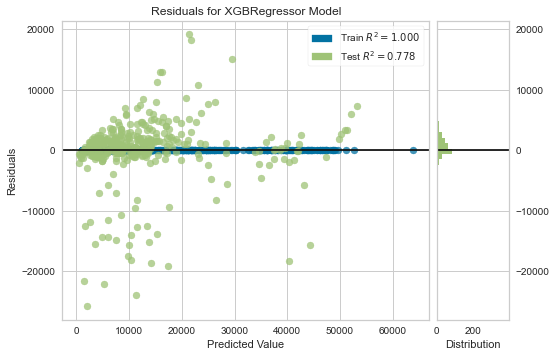

In [12]:
plot_model(tune_egb)

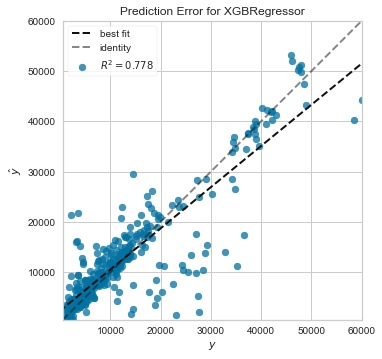

In [13]:
plot_model(tune_egb, plot = 'error')

### Feature Importance Plot

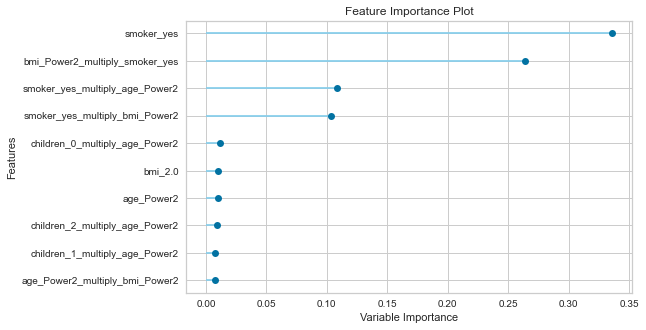

In [14]:
plot_model(tune_egb, plot='feature')

### Predict on Test/Hold-out sample

In [15]:
predict_model(tune_egb);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting Regressor,3040.3655,2.936226e+07,5418.6958,0.7775,0.53,0.3761


### Finalized model

In [16]:
final_egb = finalize_model(tune_egb)
print(final_egb)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=110, min_child_weight=1, missing=None, n_estimators=800,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.5, verbosity=0)


In [17]:
unseen_predictions = predict_model(final_egb, data=data_unseen)
unseen_predictions.head()

,age,sex,bmi,children,smoker,region,charges,Label
0,18,female,27.280,3,yes,southeast,18223.45120,18265.259766
1,35,male,17.860,1,no,northwest,5116.50040,5116.465820
2,59,female,34.800,2,no,southwest,36910.60803,36910.636719
3,36,male,33.400,2,yes,southwest,38415.47400,38415.562500
4,37,female,25.555,1,yes,northeast,20296.86345,20296.441406


### Save model

In [25]:
save_model(final_egb,'Final Model Prod 4July2020')

Transformation Pipeline and Model Succesfully Saved


### To load a model

In [24]:
from pycaret.regression import *

In [18]:
final_egb = load_model('Final Model Prod 4July2020')

Transformation Pipeline and Model Sucessfully Loaded
[10:36:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [24]:
data= pd.read_csv()

,age,sex,bmi,children,smoker,region,charges
0,18,female,27.280,3,yes,southeast,18223.45120
1,35,male,17.860,1,no,northwest,5116.50040
2,59,female,34.800,2,no,southwest,36910.60803
3,36,male,33.400,2,yes,southwest,38415.47400
4,37,female,25.555,1,yes,northeast,20296.86345


In [19]:
unseen_predictions = predict_model(final_egb, data=data_unseen)
unseen_predictions.head()

,age,sex,bmi,children,smoker,region,charges,Label
0,18,female,27.280,3,yes,southeast,18223.45120,18237.837891
1,35,male,17.860,1,no,northwest,5116.50040,5116.435547
2,59,female,34.800,2,no,southwest,36910.60803,36910.476562
3,36,male,33.400,2,yes,southwest,38415.47400,38415.398438
4,37,female,25.555,1,yes,northeast,20296.86345,20296.800781


In [ ]:
import requests
url = 'https://pycaret-insurance.herokuapp.com/predict_api'
pred = requests.post(url,json={'age':55, 'sex':'male', 'bmi':59, 'children':1, 'smoker':'male', 'region':'northwest'})
print(pred.json())